## Chord Diagrams

This practice shows how to create chord diagrams in R. 

In [2]:
library(networkD3)
 
hairColourData <- matrix(c(11975,  1951,  8010, 1013,
                             5871, 10048, 16145,  990,
                             8916,  2060,  8090,  940,
                             2868,  6171,  8045, 6907),
                             nrow = 4)
                             
cn <- chordNetwork(Data = hairColourData, 
              width = 700, 
              height = 700,
             colourScale = c("#000000", 
                              "#FFDD89", 
                              "#957244", 
                              "#F26223"),
              labels = c("red", "brown", "blond", "gray"))



In [3]:
# Now display it 
cn
# We can also save it 
# saveNetwork(cn, "net.html", selfcontained = TRUE)

HTML widgets cannot be represented in plain text (need html)

We can also use the ***circlize*** package to create chord diagrams. Here are the references for the package: 

[Visualize Relations by Chord Diagram](https://cran.r-project.org/web/packages/circlize/vignettes/visualize_relations_by_chord_diagram.pdf)

[circlize reference](https://cran.r-project.org/web/packages/circlize/circlize.pdf)

[Introduction to circlize](https://cran.r-project.org/web/packages/circlize/vignettes/circlize.pdf)

First, we'll need to install the package to our home folders. Run the following two lines only **once**. 

In [4]:
# Uncomment and run the following 
# two commands only ONCE, then comment again.

#system("mkdir ~/bin")
#install.packages("circlize", lib="~/bin/")

Warning message in sample.int(length(x), size, replace, prob):
“'.Random.seed' is not an integer vector but of type 'NULL', so ignored”

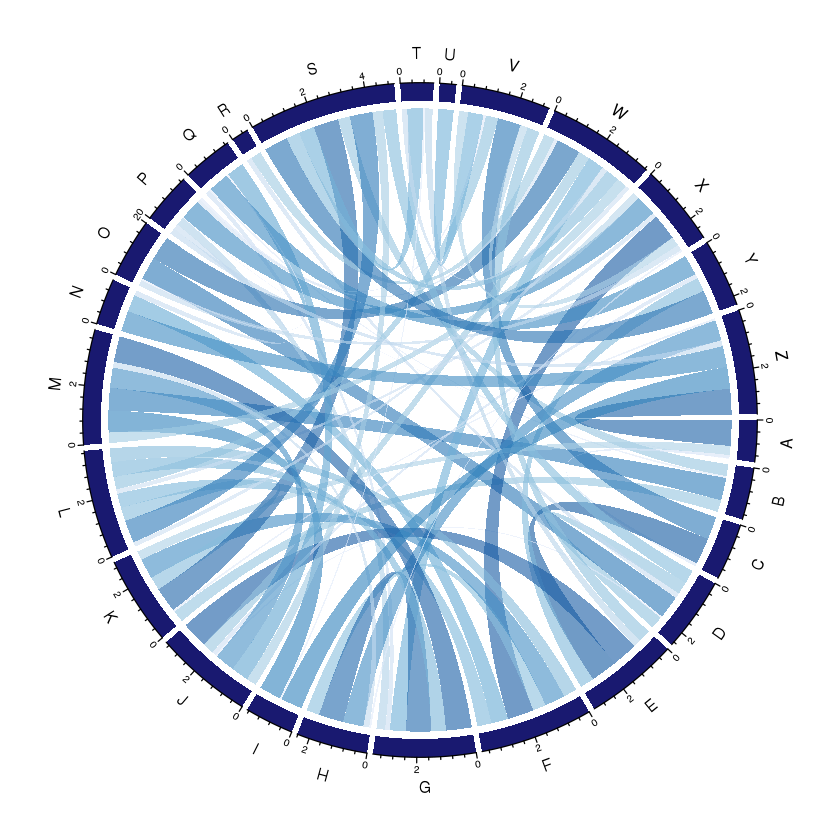

In [5]:
# This is how we use a locally installed library 
library(circlize, lib.loc="~/bin/")
library(RColorBrewer)
 
# Simple example: create a random adjacency matrix
#
adj = matrix(sample(c(1, 0), 26**2, replace = TRUE, prob = c(1, 9)),
             nrow = 26, dimnames = list(LETTERS, LETTERS))
 
adj = ifelse(adj == 1, runif(26**2), 0)
 
chordDiagram(adj, transparency = 0.4, grid.col = "midnightblue",
             col = colorRamp2(seq(0, 1, 0.2), brewer.pal(6, "Blues")))

In [6]:
# Another example of random data 
set.seed(999)
mat = matrix(sample(18, 18), 3, 6)
rownames(mat) = paste0("S", 1:3)
colnames(mat) = paste0("E", 1:6)
mat

df = data.frame(from = rep(rownames(mat), times = ncol(mat)), 
                to = rep(colnames(mat), each = nrow(mat)),
                value = as.vector(mat),
                stringsAsFactors = FALSE)

df = df[sample(18, 10), ]
df


,E1,E2,E3,E4,E5,E6
S1,8,13,18,6,11,14
S2,10,12,1,3,5,7
S3,2,16,4,17,9,15


,from,to,value
3,S3,E1,2
2,S2,E1,10
15,S3,E5,9
10,S1,E4,6
8,S2,E3,1
5,S2,E2,12
16,S1,E6,14
12,S3,E4,17
6,S3,E2,16
11,S2,E4,3


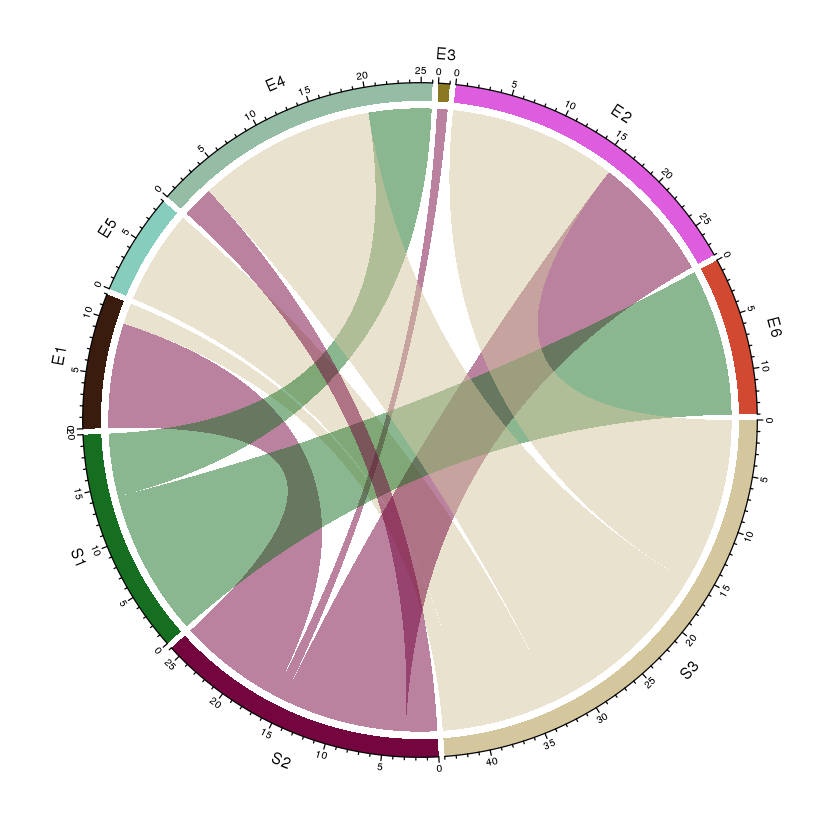

In [11]:
# Now plot it
chordDiagram(df)
